<a href="https://colab.research.google.com/github/chetansgode/Health_Insurance_Cross_Sales_Prediction_classification/blob/main/Health_Insurance_Cross_Sales_Prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sales Prediction



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual



# **Project Summary -**

  *      Insurance  company has provided Health insurance to its customers and Now They want to expand their bussiness in Vahicle insurance So they want model to predict wheather the customers or Health insurance policy Holder will be intersted in Vahicle insurance or not.
  *      Just like Medical Insurance, there is Vehicle Insurance where every year customers needs to pay certain amount of premium to insurance provider company so that in case of unfortunate accident by vehicle,then insurance company will provide a compensation  to the customers.


# **GitHub Link -**

https://github.com/chetansgode/Health_Insurance_Cross_Sales_Prediction_classification.git

# **Problem Statement**


**Insurance Company want to expand their bussiness in Vahicle insurance So they want model to predict wheather the customers or Health insurance policy Holder will be intersted in Vahicle insurance or not.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [115]:
# import library
import numpy as np
import pandas as pd
# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
%lsmagic
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for ml module creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,roc_auc_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import cross_validate,GridSearchCV
# To feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Dataset Loading

In [116]:
# Load Dataset
df=pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [117]:
# Dataset First Look

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [118]:
# Dataset Rows & Columns count

df.shape
print('dataset has no of row - ',df.shape[0])
print('dataset has no of column - ',df.shape[1])

dataset has no of row -  381109
dataset has no of column -  12


### Dataset Information

In [119]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [120]:
# Dataset Duplicate Value Count
print('Dataset has no of Duplicate values - ',df.duplicated().sum())

Dataset has no of Duplicate values -  0


#### Missing Values/Null Values

In [121]:
# Missing Values/Null Values Count
missing_values= df.isna().sum().sum()
print(f"Dataset has no of Null values -{missing_values}" )

Dataset has no of Null values -0


In [122]:
# Visualizing the missing values

#### Feature Engineering

In [123]:
# Need to convert categorical value into numerical format

#1--Replace Gender type male by 1 and female by 0 (categorical feature)

df['Gender']=np.where(df['Gender']=='Male',1,0)


#2--Replace Vehicle_Age(< 1 Year by 0, 1-2 Year by 1 ,> 2 Years  by 2)

df['Vehicle_Age']=df['Vehicle_Age'].apply(lambda x : 0 if x=='< 1 Year' else (1 if x== '1-2 Year' else 2))

#3--Replace Vehicle_Damage (Yes by 1 & No by 0)

df['Vehicle_Damage']=df['Vehicle_Damage'].apply(lambda x : 1 if x=='Yes' else 0)

#4--Replace Annual_Premium (0 < x <= 25000 by 0, 25000 < x <= 50000 by 1,50000 < x <= 75000  by 2,75000 < x <= 100000 by 3,100000 < x <= 200000 by 4,200000 < x <= 300000 by 5,300000 < x <= 400000 by 6,400000 < x <= 500000 by 7, above 500000 by 8)

df['Annual_Premium']=df['Annual_Premium'].apply(lambda x : 0 if 0 < x <= 25000 else(1 if 25000 < x <= 50000 else(2 if 50000 < x <= 75000 else(3 if 75000 < x <= 100000 else(4 if 100000 < x <= 200000 else(5 if 200000 < x <= 300000 else(6 if 300000 < x <= 400000 else(7 if 400000 < x <= 500000 else 8))))))))

# Drop id columns
df.drop('id',axis=1,inplace=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  int64  
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  int64  
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 32.0 MB


### What did you know about your dataset?

* Dataset has 12 features and 381109 records.
* There are 8 categorical feature outof 12.

## ***2. Understanding Your Variables***

In [125]:
# Dataset Columns
print(df.columns)

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [126]:
# Dataset Describe
df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,0.830728,112.034295,154.347397,0.122563
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,0.600560,54.203995,83.671304,0.327936
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,29.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,1.000000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,8.000000,163.000000,299.000000,1.000000


### Variables Description

* Describing each Features
 * 'id'-Unique id for customers
 * 'Gender'- male or female (1 for male and 0 for famale) (Categorical)
 * 'Driving_License'- Customers has driving licence or not(1 for yes and 0 for no)(categorical)
 * 'Region_Code'-unique code for region of customers (categorical)
 * 'Previously_Insured'-Already has insurance or not(1 for yes and 0 for no) (categorical)

 * 'Vehicle_Age'-Age of vehicle Replace Vehicle_Age(< 1 Year by 0, 1-2 Year by 1 ,> 2 Years  by 2) (categorical)
 * 'Vehicle_Damage'-damage or not (yes by 1 and no by 0) (categorical)
 * 'Annual_Premium'-The amount need to pay as premium (categorical)
 * 'Policy_Sales_Channel'-To reach customer process types (categorical)
 * 'Vintage'-no of day customers associated with company (numerical)
 * 'Response'- customer interested or not (yes by 1 and no by 0)

### Check Unique Values for each variable.

feature :- Gender
No of unique value :- 2
No of value count :-
 1    206089
0    175020
Name: Gender, dtype: int64


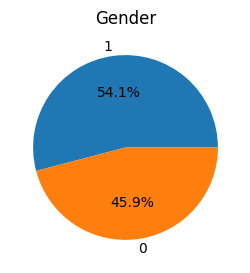

--------------------------------------------------------------------------------
feature :- Age
No of unique value :- 66
No of value count :-
 24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64


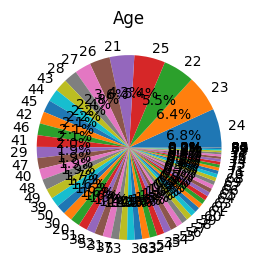

--------------------------------------------------------------------------------
feature :- Driving_License
No of unique value :- 2
No of value count :-
 1    380297
0       812
Name: Driving_License, dtype: int64


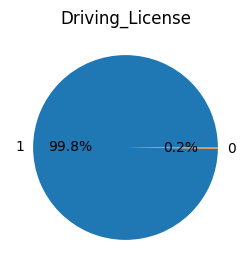

--------------------------------------------------------------------------------
feature :- Region_Code
No of unique value :- 53
No of value count :-
 28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64


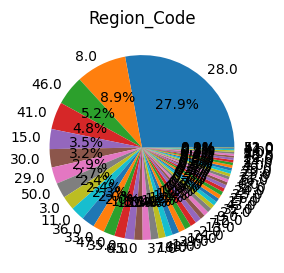

--------------------------------------------------------------------------------
feature :- Previously_Insured
No of unique value :- 2
No of value count :-
 0    206481
1    174628
Name: Previously_Insured, dtype: int64


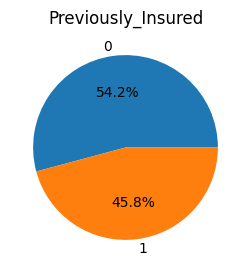

--------------------------------------------------------------------------------
feature :- Vehicle_Age
No of unique value :- 3
No of value count :-
 1    200316
0    164786
2     16007
Name: Vehicle_Age, dtype: int64


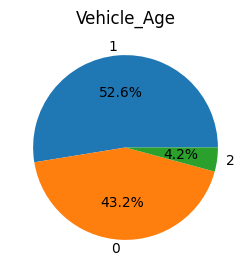

--------------------------------------------------------------------------------
feature :- Vehicle_Damage
No of unique value :- 2
No of value count :-
 1    192413
0    188696
Name: Vehicle_Damage, dtype: int64


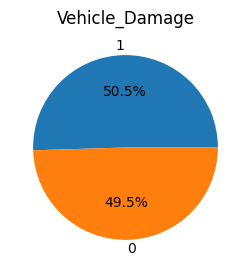

--------------------------------------------------------------------------------
feature :- Policy_Sales_Channel
No of unique value :- 155
No of value count :-
 152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64


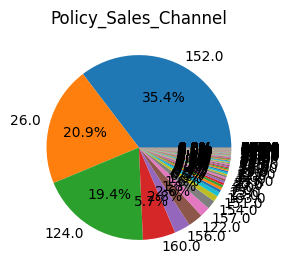

--------------------------------------------------------------------------------
feature :- Vintage
No of unique value :- 290
No of value count :-
 256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64


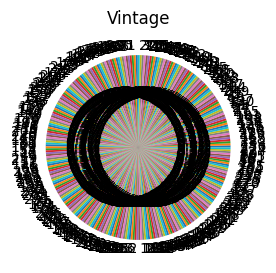

--------------------------------------------------------------------------------
feature :- Response
No of unique value :- 2
No of value count :-
 0    334399
1     46710
Name: Response, dtype: int64


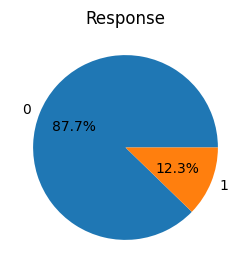

--------------------------------------------------------------------------------


In [127]:
# Check Unique Values for each variable.


for i in df.columns:
  if i not in ['id','Annual_Premium']:
    print( 'feature :-', i )
    print('No of unique value :-',df[i].nunique())
    print('No of value count :-\n',df[i].value_counts())
    labels=df[i].value_counts().index

    #visualize above data
    plt.figure(figsize=(3,3))
    plt.pie(df[i].value_counts(),labels=labels, autopct='%1.1f%%')
    plt.title(i)
    plt.show()
    print('--'*40)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [128]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Age vs Response from Customers

In [129]:
# Chart - 1 Numerical Data-Age vs Response from Customers

# Top 20 Age of Customers that Response Positively.
most_responding=df.groupby('Age')['Response'].value_counts().unstack().sort_values(by=df['Response'][2],ascending=False)[:20]
most_responding.rename(columns={0:'No',1:'Yes'},inplace=True)
print(most_responding)
print('--'*20)

# Top 20 Age of Customers that Response Negatively.
most_not_responding=df.groupby('Age')['Response'].value_counts().unstack().sort_values(by=df['Response'][1],ascending=False)[:20]
most_not_responding.rename(columns={0:'No',1:'Yes'},inplace=True)
print(most_not_responding)


Response      No     Yes
Age                     
44        6546.0  1811.0
43        6632.0  1805.0
45        6408.0  1775.0
46        6172.0  1707.0
42        6356.0  1651.0
41        6121.0  1615.0
47        5744.0  1607.0
40        5618.0  1550.0
48        5613.0  1500.0
39        5085.0  1375.0
38        4405.0  1305.0
49        5317.0  1298.0
50        5007.0  1256.0
37        4255.0  1153.0
36        3914.0  1152.0
51        4796.0  1119.0
35        3824.0  1112.0
33        3925.0  1085.0
34        3818.0  1077.0
52        4550.0  1040.0
----------------------------------------
Response       No     Yes
Age                      
24        25047.0   913.0
23        23364.0   892.0
22        20201.0   763.0
25        19902.0   734.0
21        15883.0   574.0
26        13051.0   484.0
27        10289.0   471.0
28         8357.0   617.0
29         6674.0   755.0
43         6632.0  1805.0
44         6546.0  1811.0
45         6408.0  1775.0
42         6356.0  1651.0
46         6172.0  

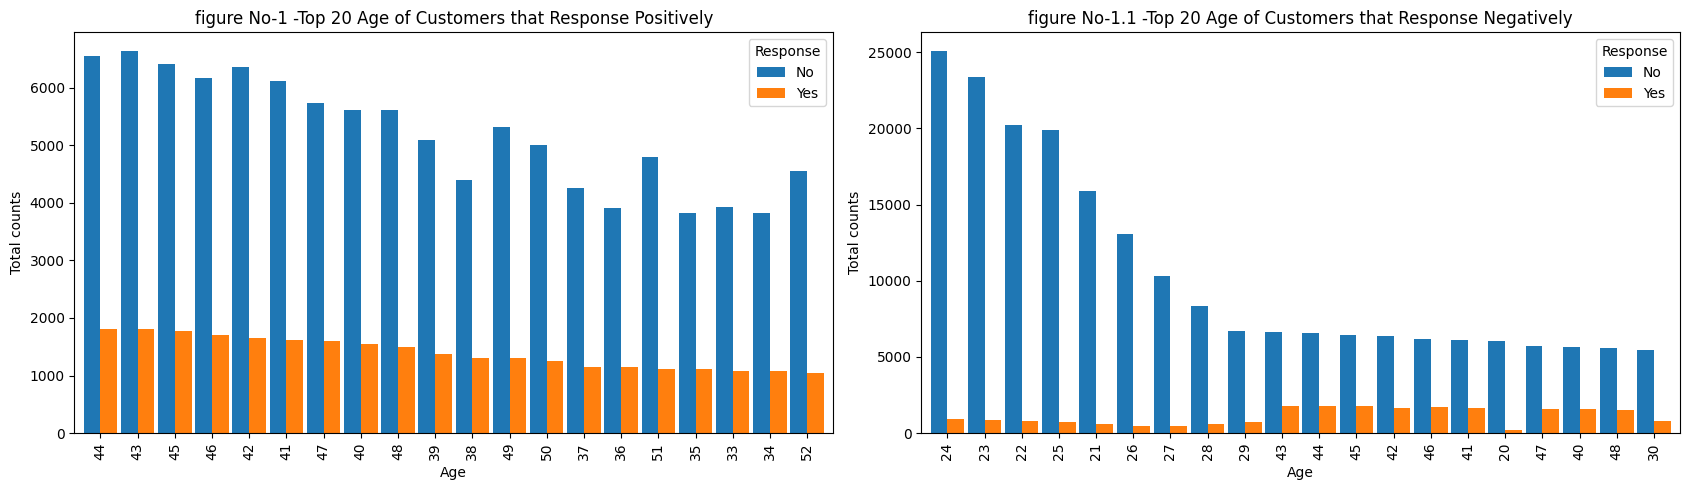

In [130]:
# Chart - 1 visualization code-Age vs Response from Customers

fig, axs = plt.subplots(1,2,figsize=(17,5))
#Top 20 Age of Customers that Response Positively.
most_responding.plot(kind='bar',width=0.9, ax=axs[0])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Total counts')
axs[0].set_title('figure No-1 -Top 20 Age of Customers that Response Positively')


# Top 20 Age of Customers that Response Negatively.
most_not_responding.plot(kind='bar',width=0.9, ax=axs[1])
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Total counts')
axs[1].set_title('figure No-1.1 -Top 20 Age of Customers that Response Negatively')

plt.tight_layout()  # Optional, to improve spacing between subplots
plt.show()

##### 1. Why did you pick the specific chart?

* It is showing easily each data to present anythings.

##### 2. What is/are the insight(s) found from the chart?

* Most responsive customer has age 44 and above above 33 age
* Most Not responding customers has age 24
* The Percent of customers responding positively is very less as compare to health insurance

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* There is lots of customers who has taken Health insurance but not Taking vehicle insurance So need to do advertisement and explain customers how it is different than other.

#### Chart - 2-Gender Wise Customers Response

In [131]:
# Chart - 2 Numerical data-Gender Wise Customers Response

# Gender wise customers response
a=df.groupby('Gender')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'Female',1:'Male'},inplace=True)
print(a)


Response      No    Yes
Gender                 
Female    156835  18185
Male      177564  28525


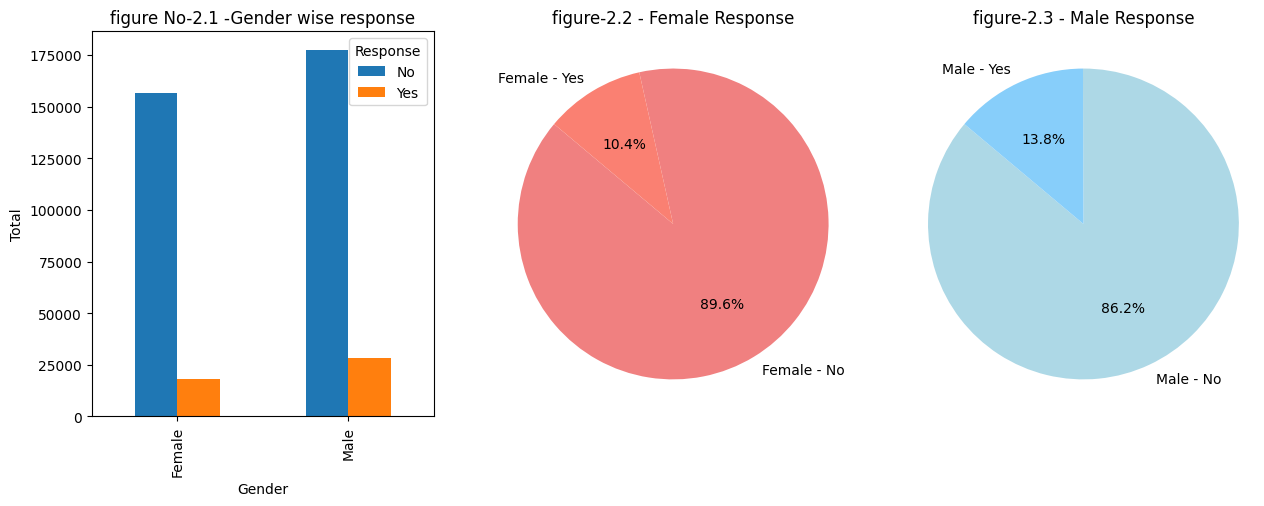

In [132]:

# Chart - 2 visualization code-Gender Wise Customers Response

fig,axs=plt.subplots(1,3,figsize=(15,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-2.1 -Gender wise response')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
gender_counts_female = [156835, 18185]
categories_female = ['Female - No', 'Female - Yes']
gender_counts_male = [177564, 28525]
categories_male = ['Male - No', 'Male - Yes']

# Plotting the pie chart

axs[1].pie(gender_counts_female, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-2.2 - Female Response')

axs[2].pie(gender_counts_male, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-2.3 - Male Response')
axs[2].axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

* To compare to active consumers and their response for new service.

##### 2. What is/are the insight(s) found from the chart?

* From above figure it's easy showing that Male are Responding Good as compare to Female.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Its chance to increase Vehicle insurance in future.
* Here is only 10.4% Female and 13.8% male are responding us so need to contact with other.

#### Chart - 3-Driving_License vs Response

In [133]:
# Chart - 3 Numerical code-Driving_License vs Response

# Driving_License wise customers response
a=df.groupby('Driving_License')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'Not_Available',1:'Available'},inplace=True)
print(a)


Response             No    Yes
Driving_License               
Not_Available       771     41
Available        333628  46669


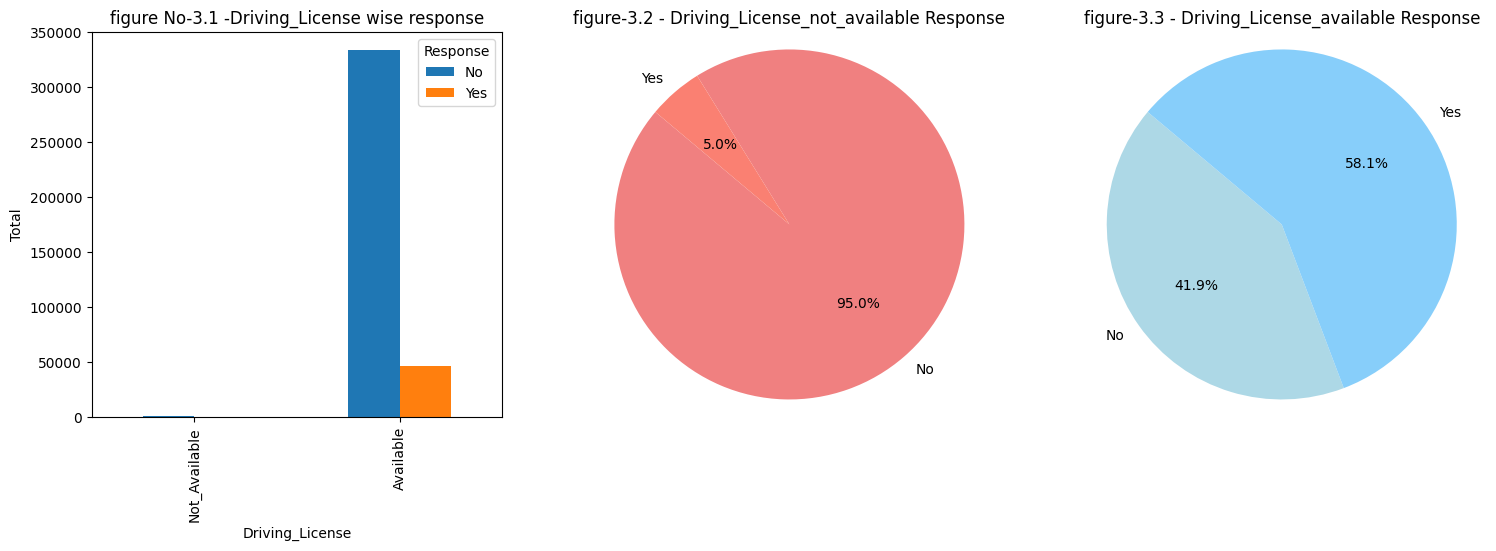

In [134]:
# Chart - 3 visualization -Driving_License vs Response

fig,axs=plt.subplots(1,3,figsize=(18,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-3.1 -Driving_License wise response')
axs[0].set_xlabel('Driving_License')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
Driving_License_not_available = [771,41]
categories_female = ['No', 'Yes']
Driving_License_available = [33628 , 46669]
categories_male = ['No', 'Yes']

# Plotting the pie chart

axs[1].pie(Driving_License_not_available, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-3.2 - Driving_License_not_available Response')

axs[2].pie(Driving_License_available, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-3.3 - Driving_License_available Response')
axs[2].axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

* To compare easily.

##### 2. What is/are the insight(s) found from the chart?

* Driving license not availble has very low response as compare to available.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* We have to Focus on driving licence available customers.

#### Chart - 4- Previously_Insured vs Response

In [135]:
# Chart - 4 - Numerical Data - Previously_Insured vs Response

# Previously_Insured wise customers response
a=df.groupby('Previously_Insured')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'Not_Previously_Insured',1:'Previously_Insured'},inplace=True)
print(a)



Response                    No    Yes
Previously_Insured                   
Not_Previously_Insured  159929  46552
Previously_Insured      174470    158


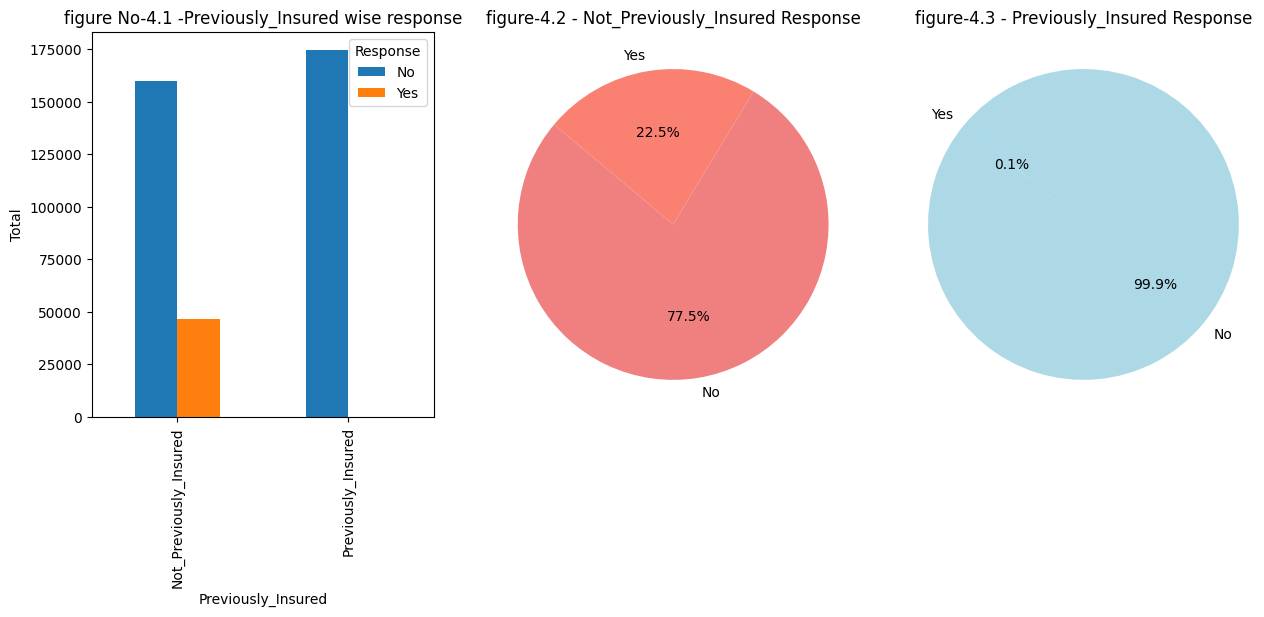

In [136]:
# Chart - 4 visualization code-Previously_Insured vs Response

fig,axs=plt.subplots(1,3,figsize=(15,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-4.1 -Previously_Insured wise response')
axs[0].set_xlabel('Previously_Insured')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
Not_Previously_Insured = [159929 , 46552]
categories_female = ['No', 'Yes']
Previously_Insured = [ 174470   , 158]
categories_male = ['No', 'Yes']

# Plotting the pie chart

axs[1].pie(Not_Previously_Insured, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-4.2 - Not_Previously_Insured Response')

axs[2].pie(Previously_Insured, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-4.3 - Previously_Insured Response')
axs[2].axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

* To visualize data easily.

##### 2. What is/are the insight(s) found from the chart?

* Here not_Previously_Insured  customers are giving positive response  than Previously insured vehicle.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Previously_Insured  has very low response 0.1% as compare to Not insured 22.5%

#### Chart - 5 -Vehicle_Damage vs Response

In [137]:
# Chart -5-numerical data -Vehicle_Damage vs Response

# Vehicle_Damage wise customers response
a=df.groupby('Vehicle_Damage')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},index={0:'No_Vehicle_Damage',1:'Vehicle_Damage'},inplace=True)
print(a)

Response               No    Yes
Vehicle_Damage                  
No_Vehicle_Damage  187714    982
Vehicle_Damage     146685  45728


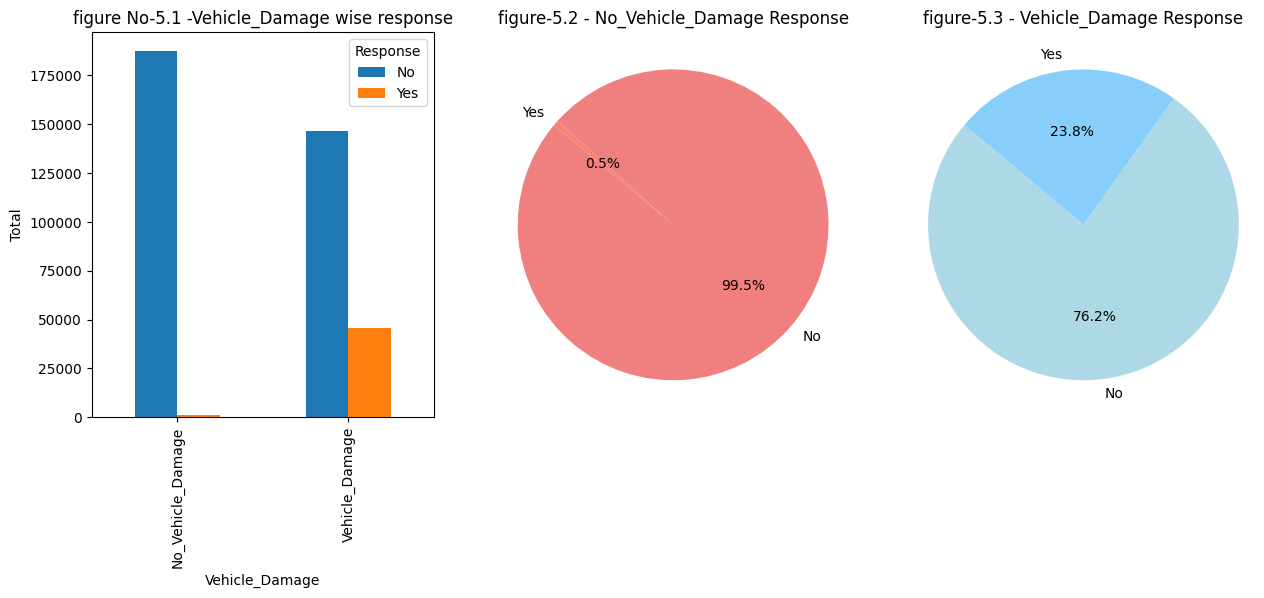

In [138]:
# Chart - 5 visualization -Vehicle_Damage vs Response

fig,axs=plt.subplots(1,3,figsize=(15,5))
a.plot(kind='bar',ax=axs[0])
axs[0].set_title('figure No-5.1 -Vehicle_Damage wise response')
axs[0].set_xlabel('Vehicle_Damage')
axs[0].set_ylabel('Total')


# Data for pie chart plot to see in percent.
No_Vehicle_Damage = [187714  ,  982]
categories_female = ['No', 'Yes']
Vehicle_Damage = [ 146685 , 45728]
categories_male = ['No', 'Yes']

# Plotting the pie chart

axs[1].pie(No_Vehicle_Damage, labels=categories_female, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'salmon', ])

axs[1].axis('equal')
axs[1].set_title('figure-5.2 - No_Vehicle_Damage Response')

axs[2].pie(Vehicle_Damage, labels=categories_male, autopct='%1.1f%%', startangle=140, colors=[ 'lightblue', 'lightskyblue'])
axs[2].set_title('figure-5.3 - Vehicle_Damage Response')
axs[2].axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

* Easy to understand.

##### 2. What is/are the insight(s) found from the chart?

* Here very vehicle not damage is giving response 0.5% as compare to damage 23.8%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Damage vehicle are more responding as compare to Not Damage vehicle.

#### Chart - 6

In [139]:
# Chart - 6 - Region_Code vs Response

#To check responed from customers
print('check responed from customers')
a=df.groupby('Region_Code')['Response'].value_counts().unstack()
a.rename(columns={0:'No',1:'Yes'},inplace=True)
print(a[:10])
print('--'*20)
# To check pertage of positive respond from region wise.
a['perc_positive_respond']=round((a['Yes']/(a['No']+a['Yes']))*100,2)

# Top 10 region have given positive respond
print('top 10 responding region')
b=a['perc_positive_respond'].sort_values(ascending=False).head(10)
print(b)
print('--'*20)
# top 10 not responding region
print('top 10 not responding region')
c=a['perc_positive_respond'].sort_values(ascending=True).head(10)
print(c)
print('--'*20)

check responed from customers
Response        No   Yes
Region_Code             
0.0           1847   174
1.0            899   109
2.0           3751   287
3.0           8070  1181
4.0           1516   285
5.0           1131   148
6.0           5841   439
7.0           2847   432
8.0          30620  3257
9.0           2848   253
10.0          4111   263
----------------------------------------
top 10 responding region
Region_Code
38.0    19.20
28.0    18.72
19.0    16.29
4.0     15.82
23.0    15.31
51.0    15.30
24.0    14.16
7.0     13.17
18.0    13.16
3.0     12.77
Name: perc_positive_respond, dtype: float64
----------------------------------------
top 10 not responding region
Region_Code
44.0    4.08
25.0    4.27
10.0    6.01
50.0    6.27
22.0    6.34
16.0    6.68
6.0     6.99
17.0    7.03
21.0    7.10
2.0     7.11
Name: perc_positive_respond, dtype: float64
----------------------------------------


<Figure size 500x500 with 0 Axes>

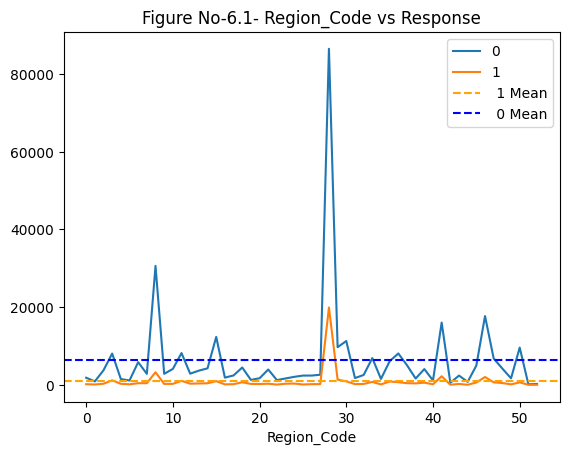

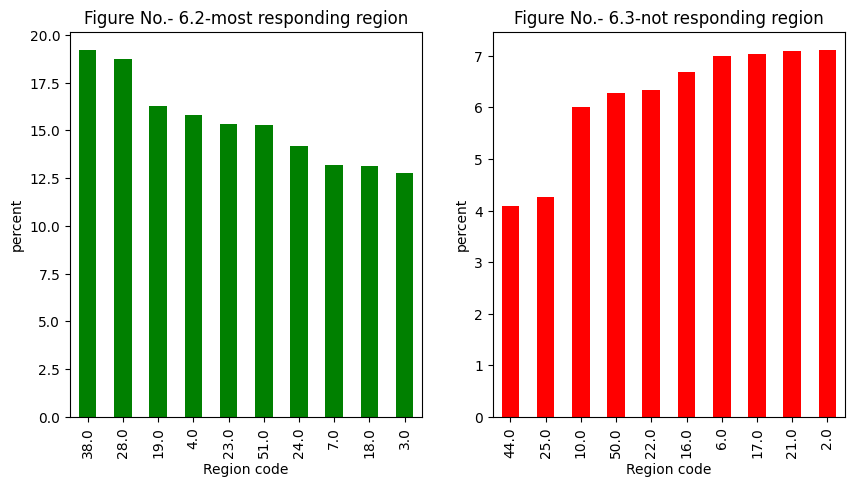

In [140]:
# Chart - 6 visualization code -Region_Code vs Response

ax=plt.figure(figsize=(5,5))
df.groupby('Region_Code')['Response'].value_counts().unstack().plot(kind='line')
plt.axhline((df.groupby('Region_Code')['Response'].value_counts().unstack())[1].mean(),linestyle='dashed',color='orange',label=' 1 Mean')
plt.axhline((df.groupby('Region_Code')['Response'].value_counts().unstack())[0].mean(),linestyle='dashed',color='blue',label=' 0 Mean')
plt.legend()
plt.title('Figure No-6.1- Region_Code vs Response')
plt.show()

# top 10 responding region
fig,axs=plt.subplots(1,2,figsize=(10,5))


a['perc_positive_respond'].sort_values(ascending=False).head(10).plot(kind='bar', ax=axs[0] ,color='green')
axs[0].set_title('Figure No.- 6.2-most responding region')
axs[0].set_xlabel('Region code')
axs[0].set_ylabel('percent')

# top 10 not responding region
a['perc_positive_respond'].sort_values(ascending=True).head(10).plot(kind='bar' , ax=axs[1],color='red')
axs[1].set_title('Figure No.- 6.3-not responding region')
axs[1].set_xlabel('Region code')
axs[1].set_ylabel('percent')
plt.show()



##### 1. Why did you pick the specific chart?

* To visualize easily.

##### 2. What is/are the insight(s) found from the chart?

* Region 38 has given most respond positively appro. 19% and region 44 has lowest responsed appro. 4 %.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Need to do advertisement to increase subscription.

#### Chart - 7

In [141]:
# Chart - 7 Numerical data Response vs Vehicle_Age
print('No of vehicle in diff category')
a=df['Vehicle_Age'].value_counts()
print(a)
print('--'*20)

# To check Response by age of vehicle and percentage of positive response too
b=df.groupby('Vehicle_Age')['Response'].value_counts().unstack().rename(columns={0:'No',1:'Yes'})
b['percentage']=round((b['Yes']/a)*100,2)
print('To check % of positive response by vehicle age')
b

No of vehicle in diff category
1    200316
0    164786
2     16007
Name: Vehicle_Age, dtype: int64
----------------------------------------
To check % of positive response by vehicle age


Response,No,Yes,percentage
Vehicle_Age,,,
0,157584,7202,4.37
1,165510,34806,17.38
2,11305,4702,29.37


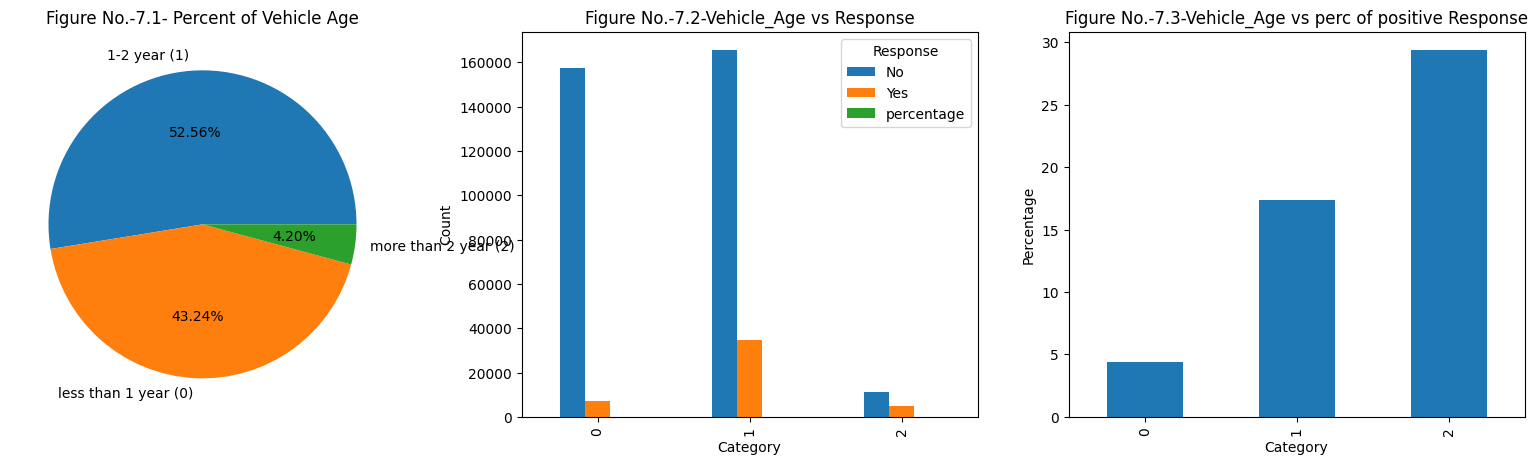

In [142]:
# Chart - 7 visualization code - Response vs Vehicle_Age
#Percent of vehicle Age
fig,axs=plt.subplots(1,3,figsize=(20,5))
labels=['1-2 year (1)','less than 1 year (0)','more than 2 year (2)']
axs[0].pie(a,labels=labels,autopct='%.2f%%')
axs[0].set_title('Figure No.-7.1- Percent of Vehicle Age')


#Check Response by Vehicle Age category and its percent
b.plot(kind='bar',ax=axs[1])
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Category')
axs[1].set_title('Figure No.-7.2-Vehicle_Age vs Response')


b['percentage'].plot(kind='bar',ax=axs[2])

axs[2].set_ylabel('Percentage')
axs[2].set_xlabel('Category')
axs[2].set_title('Figure No.-7.3-Vehicle_Age vs perc of positive Response')
plt.show()


##### 1. Why did you pick the specific chart?

* To better understand what customer want.

##### 2. What is/are the insight(s) found from the chart?

* Vehicle age more than 2 year has less Register but Has shown More Positive responsed appr. 29 %.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes

#### Chart - 8 - Annual_Premium vs Response

In [143]:
#chart-9- Annual_Premium vs Response numerical data
print('Annual_Premium vs Response')
a=df.groupby('Annual_Premium')['Response'].value_counts().unstack().rename(columns={0:'No',1:'Yes'})
print(a)
print('--'*20)
# To Check % response
print('To check %')
a['percetage'] = round((a['Yes']/(a['No']+a['Yes']))*100,2)
print(a)

Annual_Premium vs Response
Response            No    Yes
Annual_Premium               
0                89142  11821
1               217952  29990
2                24511   4404
3                 2139    372
4                  565    101
5                   48     13
6                   33      5
7                    5      3
8                    4      1
----------------------------------------
To check %
Response            No    Yes  percetage
Annual_Premium                          
0                89142  11821      11.71
1               217952  29990      12.10
2                24511   4404      15.23
3                 2139    372      14.81
4                  565    101      15.17
5                   48     13      21.31
6                   33      5      13.16
7                    5      3      37.50
8                    4      1      20.00


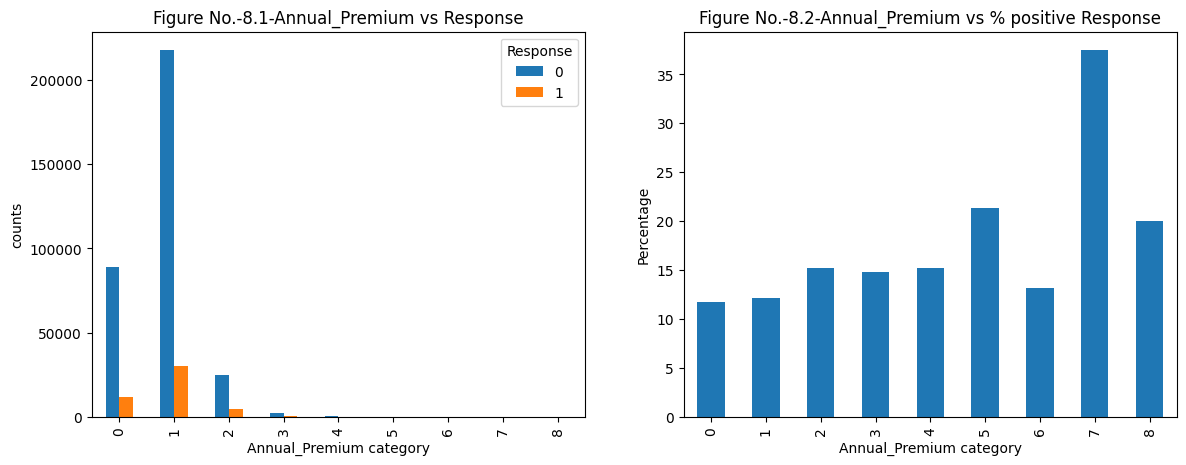

In [144]:
# Chart - 8 visualization code

#Annual_Premium vs Response

fig,axs=plt.subplots(1,2,figsize=(14,5))
df.groupby('Annual_Premium')['Response'].value_counts().unstack().plot(kind='bar',ax=axs[0])
axs[0].set_title('Figure No.-8.1-Annual_Premium vs Response')
axs[0].set_xlabel('Annual_Premium category')
axs[0].set_ylabel('counts')


# To check %
a['percetage'].plot(kind='bar',ax=axs[1])
axs[1].set_title('Figure No.-8.2-Annual_Premium vs % positive Response')
axs[1].set_xlabel('Annual_Premium category')
axs[1].set_ylabel('Percentage')
plt.show()

##### 1. Why did you pick the specific chart?

* To easily visualize data.

##### 2. What is/are the insight(s) found from the chart?

* There are lots of customers come in category 1 ie. 25000 < annual premium <=50000 but positive responding appr. 12%.
* There is very low amount of customer of category 7 but getting positive response 37 %


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* There is lots of customers of category 0,1,2,3 so it is important to focus on them to increase sales.

#### Chart - 9-Policy_Sales_Channel vs Response

In [145]:
# Chart -9- Policy_Sales_Channel vs Response

print('Policy_Sales_Channel vs Response')
a=df.groupby('Policy_Sales_Channel')['Response'].value_counts().unstack().rename(columns={0:'No',1:'Yes'})
print(a)
print('--'*20)

# % active response
print('% active response')
a['percentage']=round(a['Yes']/(a['No']+a['Yes'])*100,2)
print(a)
print('--'*20)

Policy_Sales_Channel vs Response
Response                   No     Yes
Policy_Sales_Channel                 
1.0                    1039.0    35.0
2.0                       3.0     1.0
3.0                     364.0   159.0
4.0                     407.0   102.0
6.0                       3.0     NaN
...                       ...     ...
157.0                  4890.0  1794.0
158.0                   357.0   135.0
159.0                    50.0     1.0
160.0                 21304.0   475.0
163.0                  2013.0   880.0

[155 rows x 2 columns]
----------------------------------------
% active response
Response                   No     Yes  percentage
Policy_Sales_Channel                             
1.0                    1039.0    35.0        3.26
2.0                       3.0     1.0       25.00
3.0                     364.0   159.0       30.40
4.0                     407.0   102.0       20.04
6.0                       3.0     NaN         NaN
...                       ...     ...   

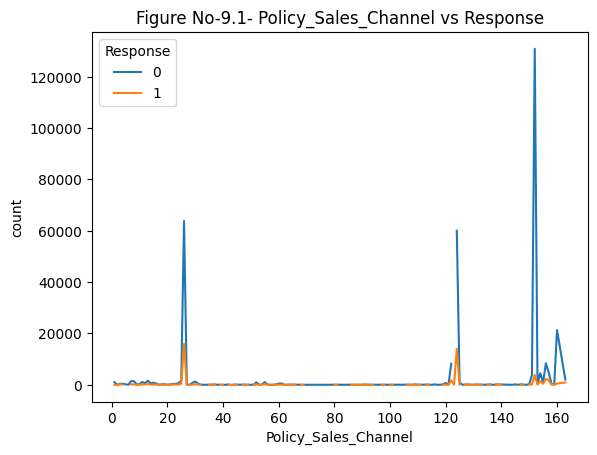

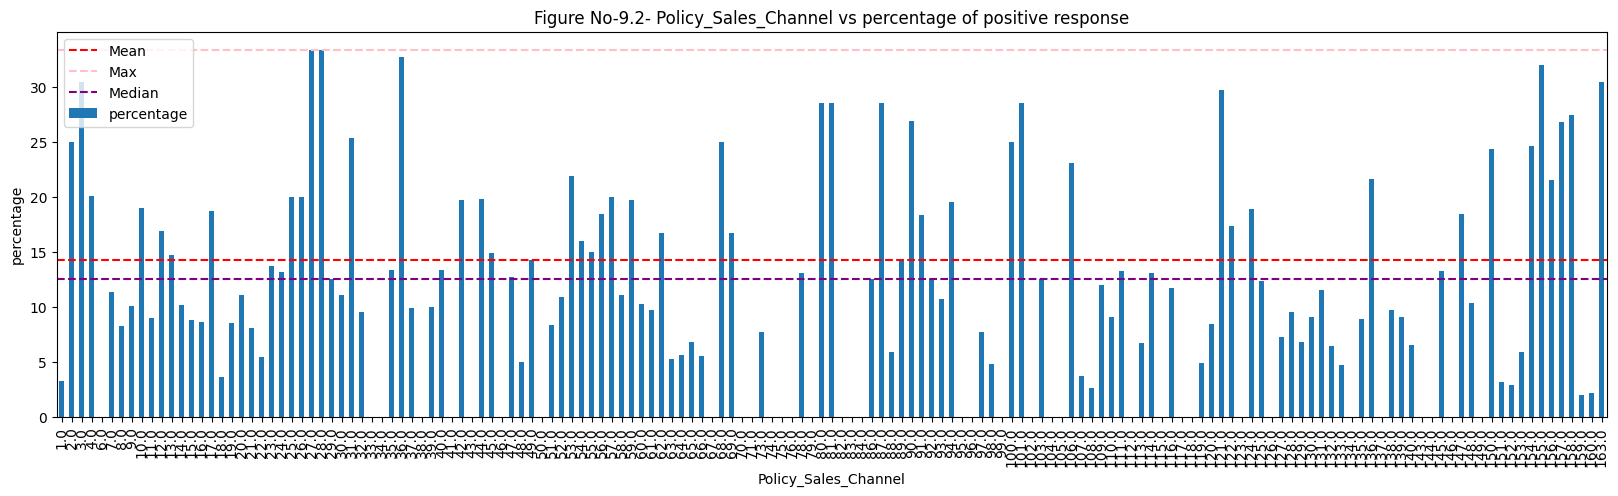

In [146]:
# Chart - 9 visualization code - Policy_Sales_Channel vs Response
#Policy_Sales_Channel vs Response
df.groupby('Policy_Sales_Channel')['Response'].value_counts().unstack().plot(kind='line')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('count')
plt.title('Figure No-9.1- Policy_Sales_Channel vs Response')
plt.show()

# To see % positive response
plt.figure(figsize=(20,5))
a['percentage'].plot(kind='bar')
plt.axhline(a['percentage'].mean(),color='red',label='Mean',linestyle='dashed')
plt.axhline(a['percentage'].max(),color='pink',label='Max',linestyle='dashed')
plt.axhline(a['percentage'].median(),color='purple',label='Median',linestyle='dashed')
plt.xlabel('Policy_Sales_Channel')
plt.ylabel('percentage')
plt.title('Figure No-9.2- Policy_Sales_Channel vs percentage of positive response')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

* To check data.

##### 2. What is/are the insight(s) found from the chart?

* Policy sales channel no 27 and 28 has given more positive response as compare to other.
* Some channel have given zero response.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* yes

#### Chart - 10 - Vintage vs Response

In [147]:
# Chart - 10 -Numerical data for Vintage vs Response
print('Vintage vs Response')
a=df.groupby('Vintage')['Response'].value_counts().unstack().rename(columns={0:'No',1:'Yes'})
print(a)
print('--'*20)
print('% positive response')
a['percent']=round((a['Yes']/(a['Yes']+a['No']))*100,2)
print(a)


Vintage vs Response
Response    No  Yes
Vintage            
10        1164  147
11        1153  191
12        1092  165
13        1145  184
14        1104  156
...        ...  ...
295       1118  157
296       1146  156
297       1142  142
298       1198  186
299       1114  169

[290 rows x 2 columns]
----------------------------------------
% positive response
Response    No  Yes  percent
Vintage                     
10        1164  147    11.21
11        1153  191    14.21
12        1092  165    13.13
13        1145  184    13.84
14        1104  156    12.38
...        ...  ...      ...
295       1118  157    12.31
296       1146  156    11.98
297       1142  142    11.06
298       1198  186    13.44
299       1114  169    13.17

[290 rows x 3 columns]


<Figure size 1500x500 with 0 Axes>

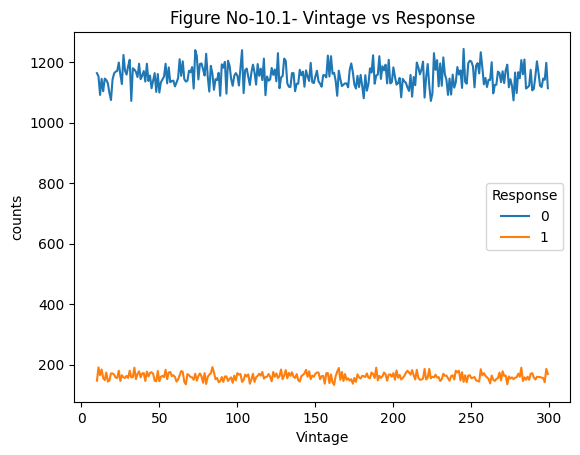

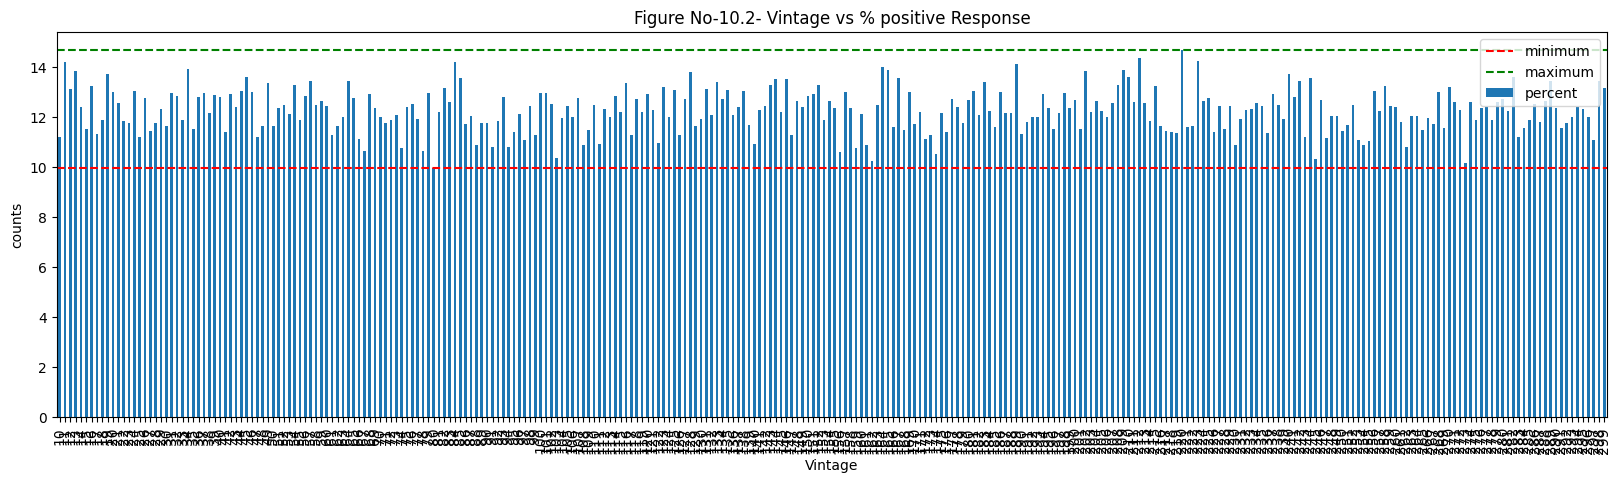

In [148]:
# Chart - 10 visualization code - Vintage vs Response
#Vintage vs Response

plt.figure(figsize=(15,5))
df.groupby('Vintage')['Response'].value_counts().unstack().plot(kind='line')
plt.title('Figure No-10.1- Vintage vs Response')
plt.xlabel('Vintage')
plt.ylabel('counts')
plt.show()

# To check % positive response
plt.figure(figsize=(20,5))
a['percent'].plot(kind='bar')
plt.axhline(a['percent'].min(),color='red',linestyle='dashed',label='minimum')
plt.axhline(a['percent'].max(),color='green',linestyle='dashed',label='maximum')
plt.title('Figure No-10.2- Vintage vs % positive Response')
plt.xlabel('Vintage')
plt.ylabel('counts')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

* To easily visualize above numerical data.

##### 2. What is/are the insight(s) found from the chart?

* Percent of positive response from 9% to max 15 percent

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes,Every category of customer has showing 10-15 % positive response.

#### Chart - 11 - scatter plot and box plot

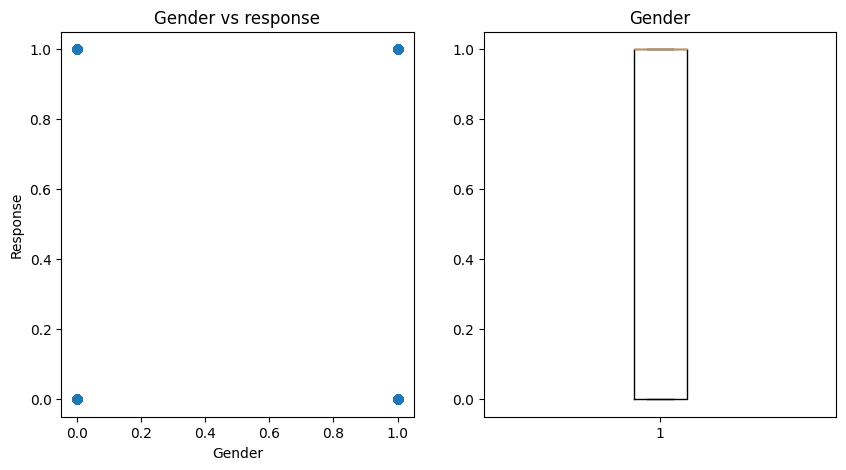

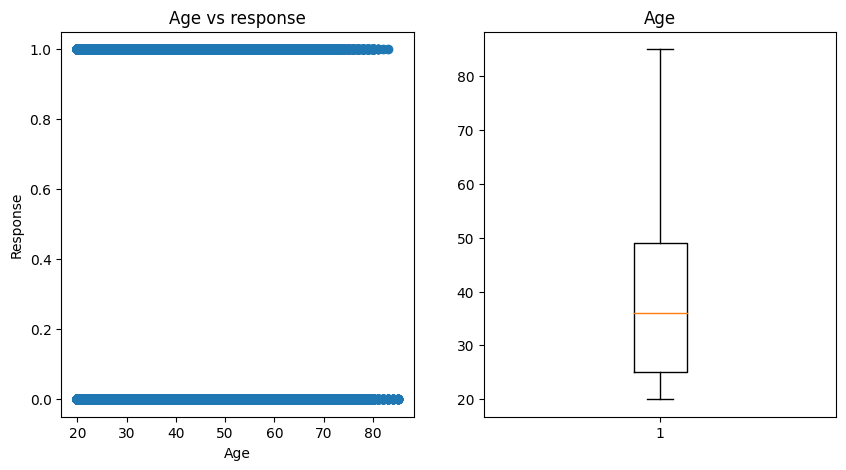

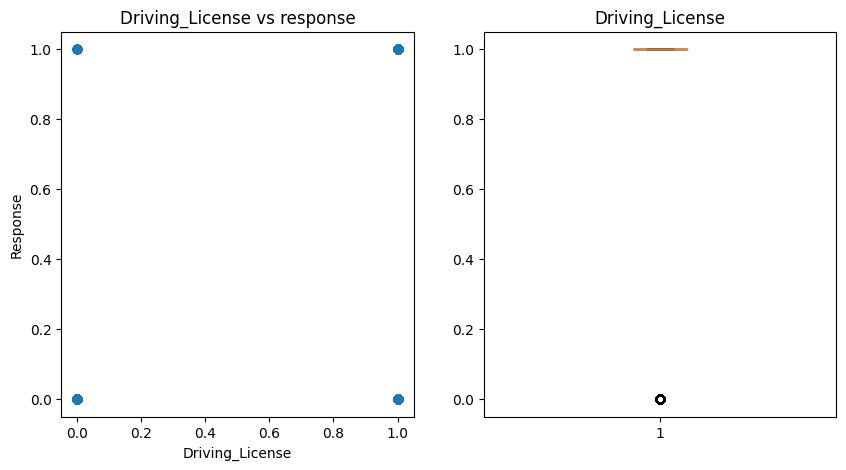

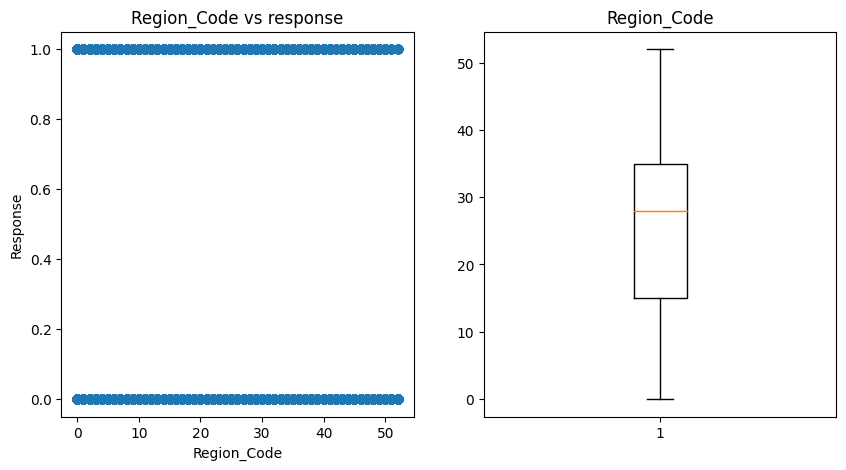

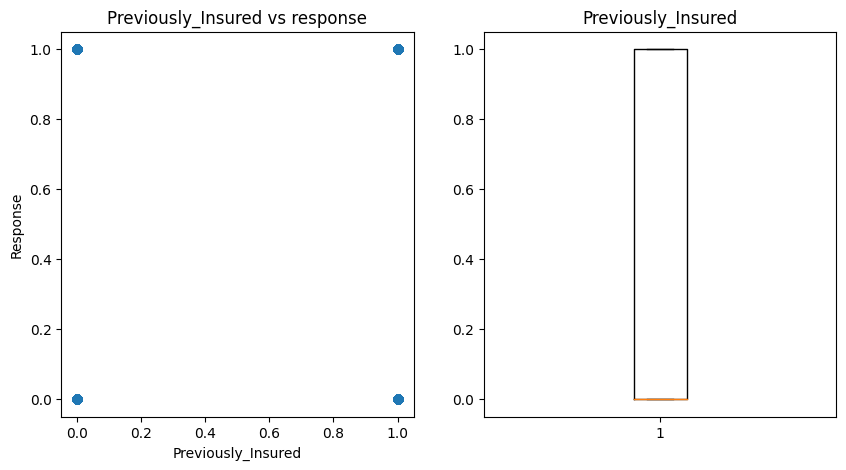

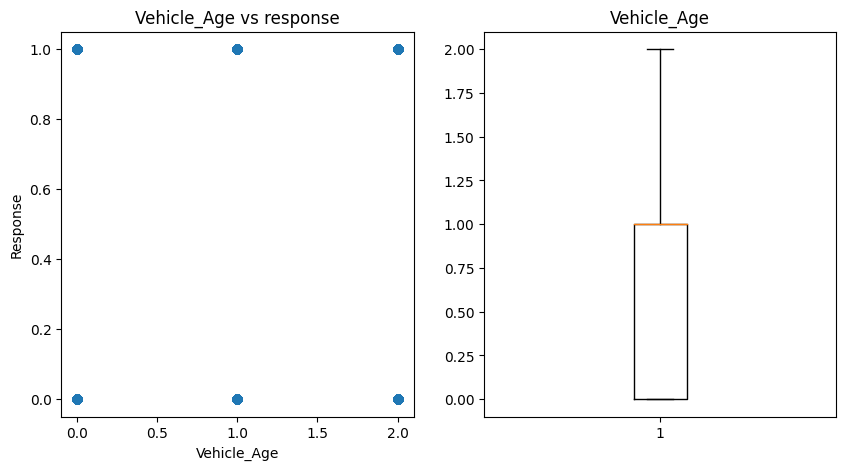

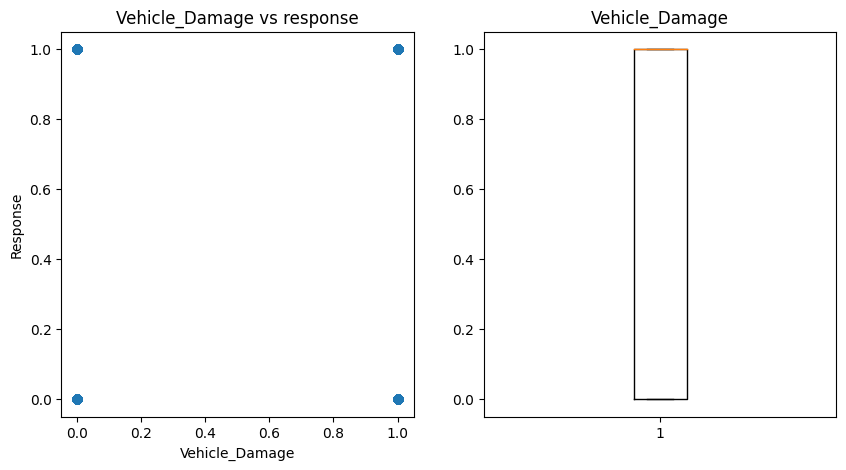

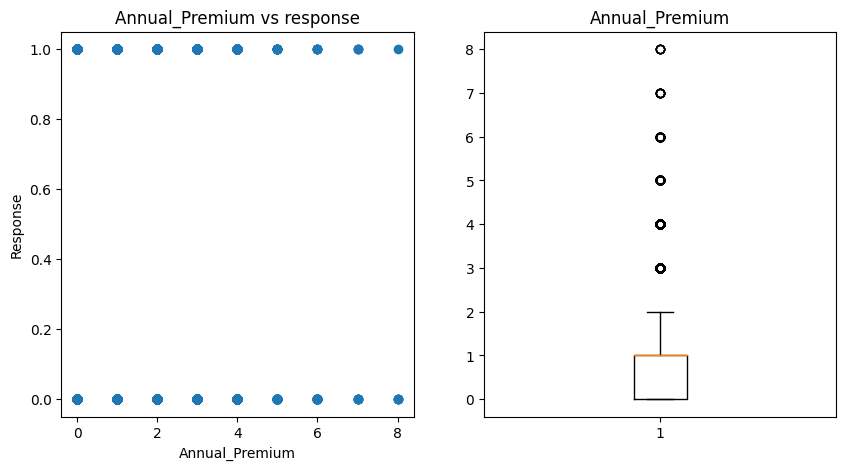

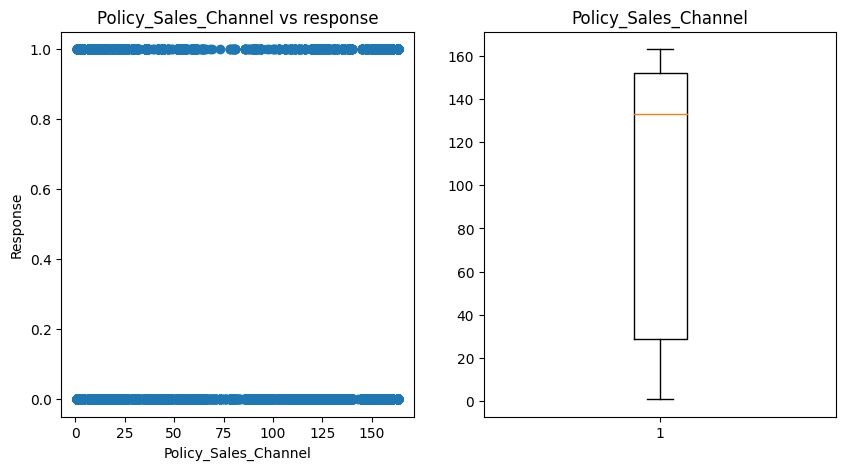

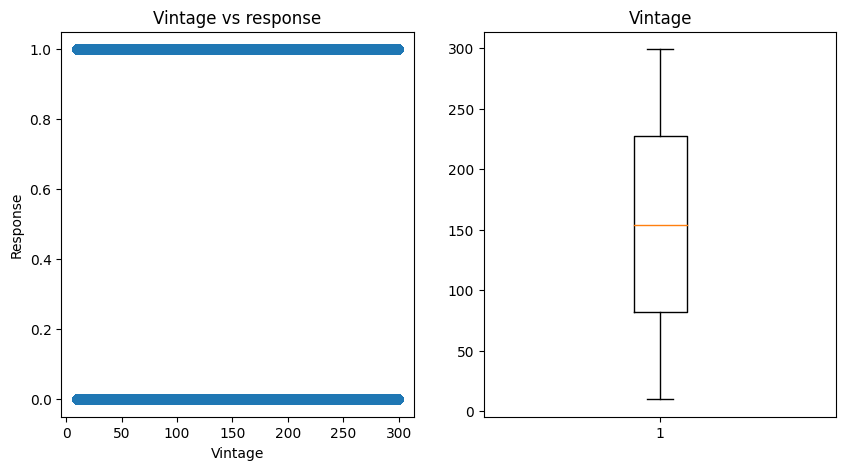

In [149]:
# Chart - 11 visualization code

for i in df.columns:
  if i != 'Response':
    fig,axs=plt.subplots(1,2,figsize=(10,5))
    axs[0].scatter(df[i],df['Response'])
    axs[0].set_title(i + " vs response")
    axs[0].set_xlabel(i)
    axs[0].set_ylabel('Response')


    axs[1].boxplot(df[i])
    axs[1].set_title(i)
    plt.show()

##### 1. Why did you pick the specific chart?

* To see distribution.

##### 2. What is/are the insight(s) found from the chart?

* Only annual premium has outlier in data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes.

#### Chart - 12 - Correlation Heatmap

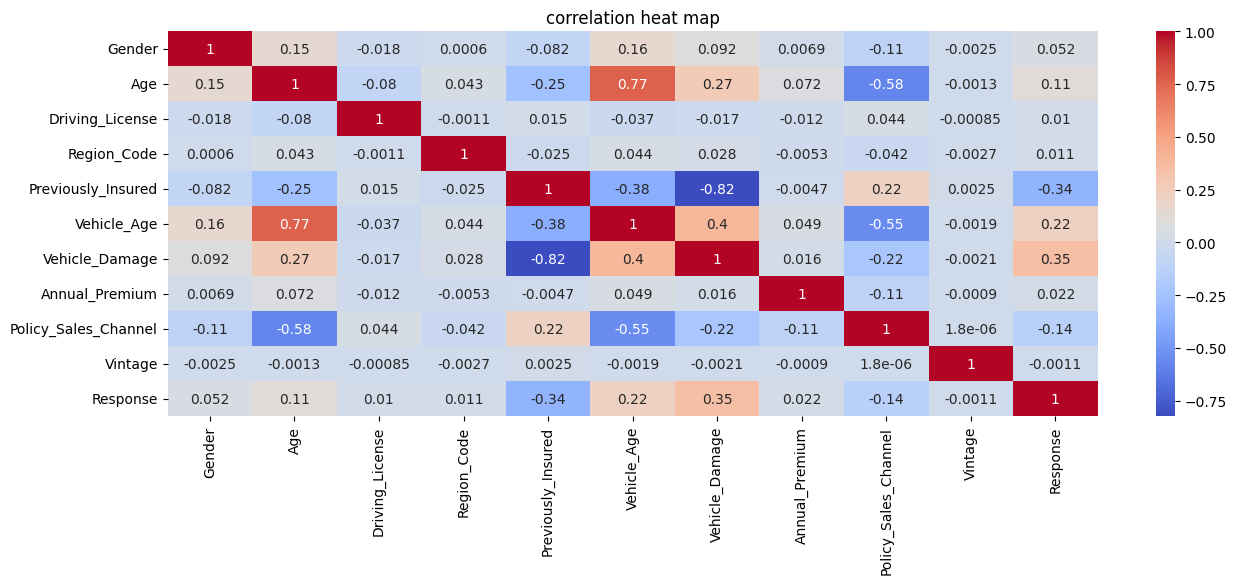

In [150]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('correlation heat map')
plt.show()

##### 1. Why did you pick the specific chart?

* To visualize correlation easily.

##### 2. What is/are the insight(s) found from the chart?

* From above graph we got information no one variable are more correlated to each other except 'age' and vehicle age.

#### Chart - 13 - Pair Plot

In [151]:
# Pair Plot visualization code

# sns.pairplot(data=df)
# plt.show()

##### 1. Why did you pick the specific chart?

* To see relationship between each variable with other.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [152]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [153]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [154]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [155]:
# Handling Missing Values & Missing Value Imputation (Already check above just showing code here)

# Missing Values/Null Values Count
missing_values= df.isna().sum().sum()
print(f"Dataset has no of Null values - {missing_values}" )

Dataset has no of Null values - 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

* Here is no one missing value so no need to do anything.

### 2. Handling Outliers

<Figure size 400x400 with 0 Axes>

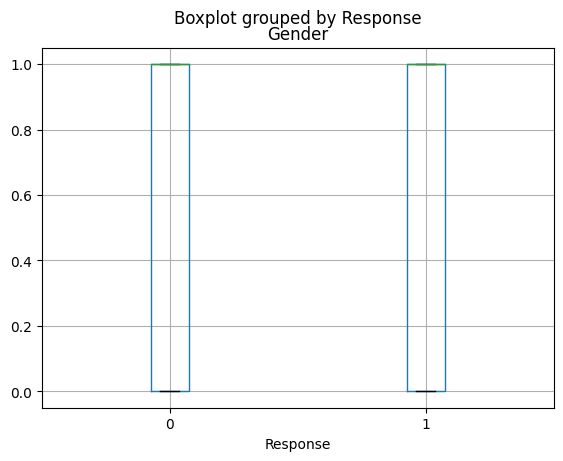

<Figure size 400x400 with 0 Axes>

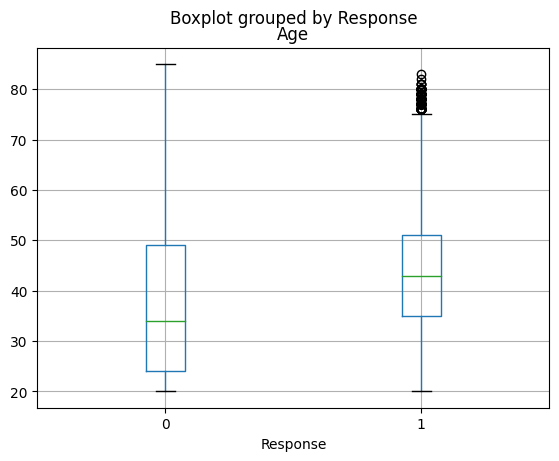

<Figure size 400x400 with 0 Axes>

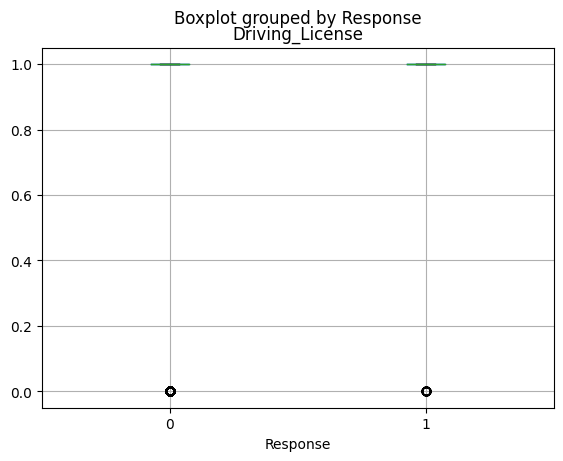

<Figure size 400x400 with 0 Axes>

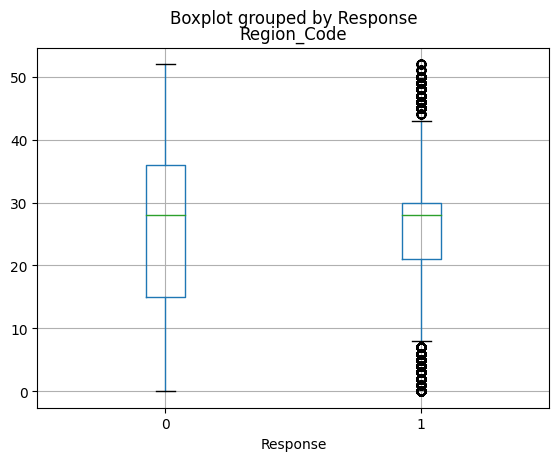

<Figure size 400x400 with 0 Axes>

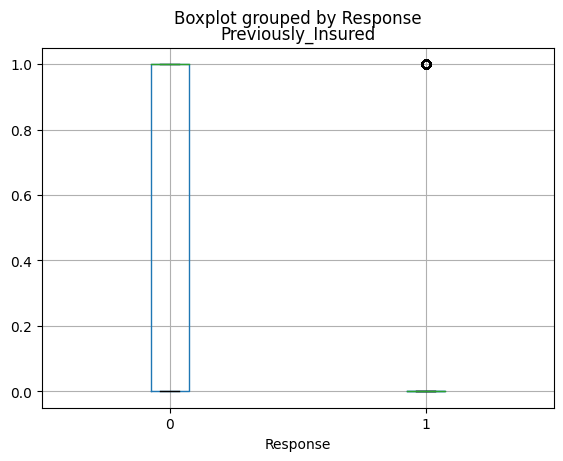

<Figure size 400x400 with 0 Axes>

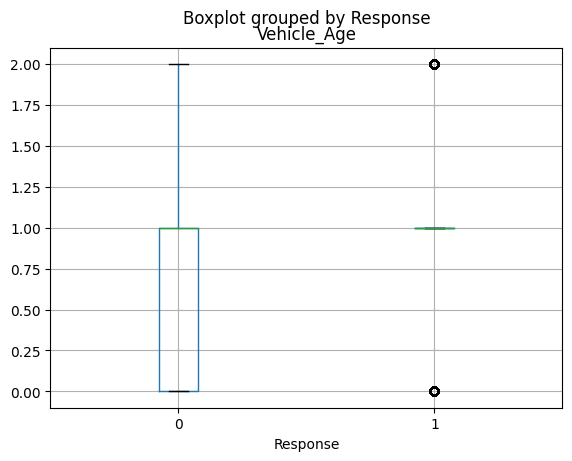

<Figure size 400x400 with 0 Axes>

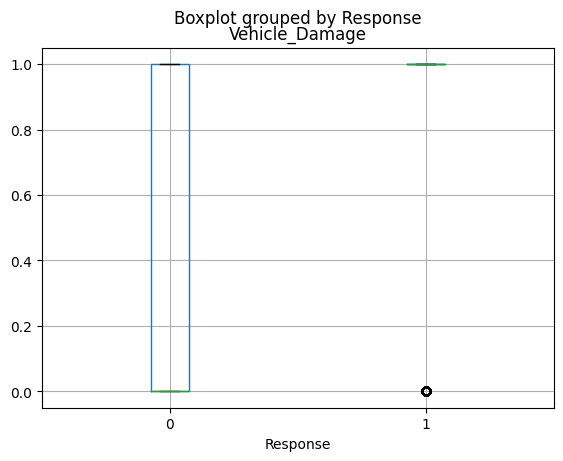

<Figure size 400x400 with 0 Axes>

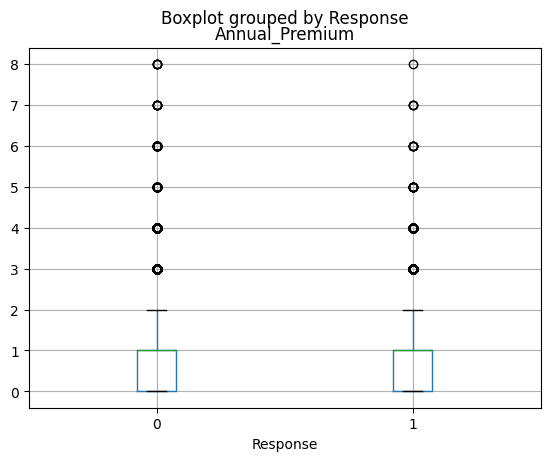

<Figure size 400x400 with 0 Axes>

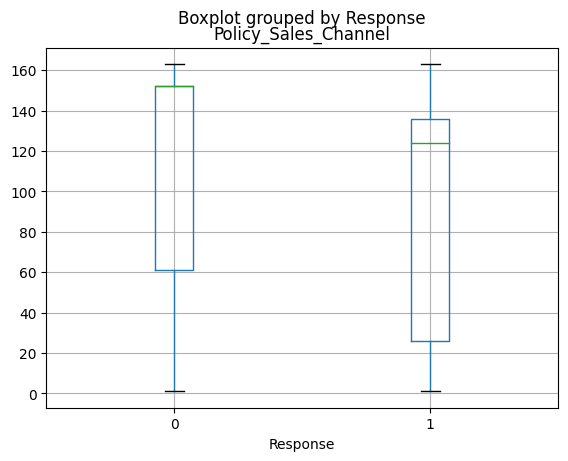

<Figure size 400x400 with 0 Axes>

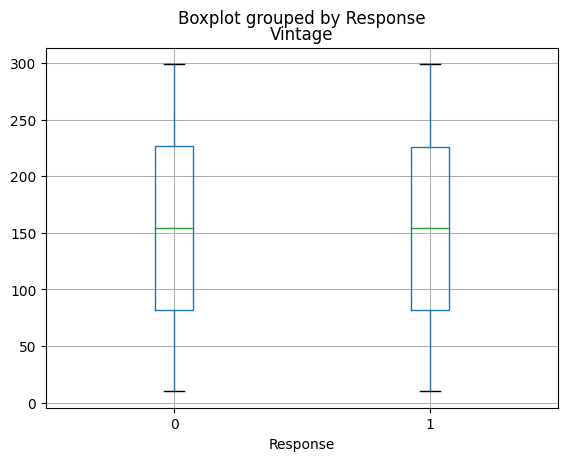

<Figure size 400x400 with 0 Axes>

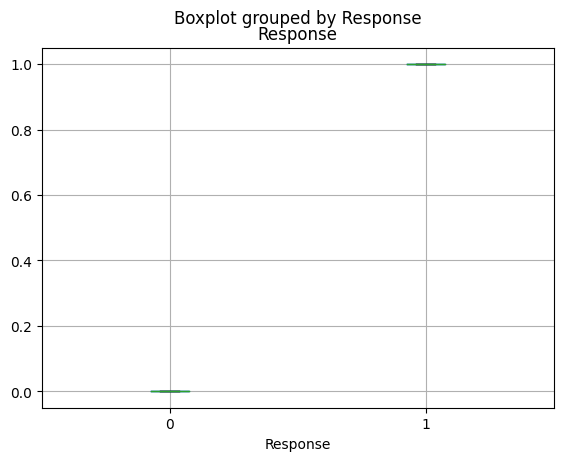

In [156]:
# Handling Outliers & Outlier treatments
for i in df.columns:
  plt.figure(figsize=(4,4))
  df.boxplot(column=i,by='Response')
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [157]:
# Encode your categorical columns('already done above just showing code here')

"""# Need to convert categorical value into numerical format

#1--Replace Gender type male by 1 and female by 0 (categorical feature)

df['Gender']=np.where(df['Gender']=='Male',1,0)


#2--Replace Vehicle_Age(< 1 Year by 0, 1-2 Year by 1 ,> 2 Years  by 2)

df['Vehicle_Age']=df['Vehicle_Age'].apply(lambda x : 0 if x=='< 1 Year' else (1 if x== '1-2 Year' else 2))

#3--Replace Vehicle_Damage (Yes by 1 & No by 0)

df['Vehicle_Damage']=df['Vehicle_Damage'].apply(lambda x : 1 if x=='Yes' else 0)

#4--Replace Annual_Premium (0 < x <= 25000 by 0, 25000 < x <= 50000 by 1,50000 < x <= 75000  by 2,75000 < x <= 100000 by 3,100000 < x <= 200000 by 4,200000 < x <= 300000 by 5,300000 < x <= 400000 by 6,400000 < x <= 500000 by 7, above 500000 by 8)

df['Annual_Premium']=df['Annual_Premium'].apply(lambda x : 0 if 0 < x <= 25000 else(1 if 25000 < x <= 50000 else(2 if 50000 < x <= 75000 else(3 if 75000 < x <= 100000 else(4 if 100000 < x <= 200000 else(5 if 200000 < x <= 300000 else(6 if 300000 < x <= 400000 else(7 if 400000 < x <= 500000 else 8))))))))
"""
# Policy_Sales_Channel has to many unique value so categories it into 5 catefory.
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].apply(lambda x : 0 if x<=20 else(1 if 20<x<=40 else(2 if 40<x<=120 else(3 if 120<x<=140 else 4))))

# Region_Code has to many unique value so categories it into 5 catefory.
df['Region_Code']=df['Region_Code'].apply(lambda x : 0 if x<=10 else(1 if 10<x<=20 else(2 if 20<x<=30 else(3 if 30<x<=40 else 4))))

"# Need to convert categorical value into numerical format\n\n#1--Replace Gender type male by 1 and female by 0 (categorical feature)\n\ndf['Gender']=np.where(df['Gender']=='Male',1,0)\n\n\n#2--Replace Vehicle_Age(< 1 Year by 0, 1-2 Year by 1 ,> 2 Years  by 2)\n\ndf['Vehicle_Age']=df['Vehicle_Age'].apply(lambda x : 0 if x=='< 1 Year' else (1 if x== '1-2 Year' else 2))\n\n#3--Replace Vehicle_Damage (Yes by 1 & No by 0)\n\ndf['Vehicle_Damage']=df['Vehicle_Damage'].apply(lambda x : 1 if x=='Yes' else 0)\n\n#4--Replace Annual_Premium (0 < x <= 25000 by 0, 25000 < x <= 50000 by 1,50000 < x <= 75000  by 2,75000 < x <= 100000 by 3,100000 < x <= 200000 by 4,200000 < x <= 300000 by 5,300000 < x <= 400000 by 6,400000 < x <= 500000 by 7, above 500000 by 8)\n\ndf['Annual_Premium']=df['Annual_Premium'].apply(lambda x : 0 if 0 < x <= 25000 else(1 if 25000 < x <= 50000 else(2 if 50000 < x <= 75000 else(3 if 75000 < x <= 100000 else(4 if 100000 < x <= 200000 else(5 if 200000 < x <= 300000 else(6 if 30

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Just because we have to fit all data into ML-modules

### 4. Textual Data Preprocessing  (No need here because no textual data )
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [158]:
# Expand Contraction

#### 2. Lower Casing

In [159]:
# Lower Casing

#### 3. Removing Punctuations

In [160]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [161]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [162]:
# Remove Stopwords

In [163]:
# Remove White spaces

#### 6. Rephrase Text

In [164]:
# Rephrase Text

#### 7. Tokenization

In [165]:
# Tokenization

#### 8. Text Normalization

In [166]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [167]:
# POS Taging

#### 10. Text Vectorization

In [168]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [208]:
# Manipulate Features to minimize feature correlation and create new features

# create function to calculate vif
def cal_vif(x):
  vif=pd.DataFrame()
  vif['variables']=x.columns
  vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return vif

In [209]:
#calculate VIF
cal_vif(df[[i for i in df.columns if i not in ['Response']]])

,variables,VIF
0,Gender,2.236432
1,Age,18.533773
2,Driving_License,43.796249
3,Region_Code,3.293747
4,Previously_Insured,5.728972
5,Vehicle_Age,6.119879
6,Vehicle_Damage,6.356793
7,Annual_Premium,2.938129
8,Policy_Sales_Channel,9.967020
9,Vintage,4.373877


In [213]:
#calculate VIF
cal_vif(df[[i for i in df.columns if i not in ['Response','Driving_License']]])

,variables,VIF
0,Gender,2.202899
1,Age,13.830833
2,Region_Code,3.133534
3,Previously_Insured,4.779126
4,Vehicle_Age,6.118524
5,Vehicle_Damage,5.347875
6,Annual_Premium,2.805508
7,Policy_Sales_Channel,5.702250
8,Vintage,4.095523


#### 2. Feature Selection

In [228]:
# Select your features wisely to avoid overfitting
features=cal_vif(df[[i for i in df.columns if i not in ['Response','Driving_License']]])['variables']  # # Here we ignore age just because in auc roc score FP and TP comes 0 so
features

0                  Gender
1                     Age
2             Region_Code
3      Previously_Insured
4             Vehicle_Age
5          Vehicle_Damage
6          Annual_Premium
7    Policy_Sales_Channel
8                 Vintage
Name: variables, dtype: object

##### What all feature selection methods have you used  and why?

* We have use Varience inflation factor method to check highly correlated feature.
* Here we got three highly correlated feature so we ignore them for further calculation.

##### Which all features you found important and why?

* We have mentioned all important feature in features list. who are least correlated with each others.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [174]:
# Transform Your data
#'NO need here'

### 6. Data Scaling

In [175]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [176]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=df[features].values
y=df['Response'].values

# apply train_test_module
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

##### What data splitting ratio have you used and why?

* We have splited 80:20  for train to test module.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [178]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 - Logistics Regression

In [223]:

# ML Model - 1 Implementation-Logistics Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,confusion_matrix

# Fit the Algorithm
LR=LogisticRegression(fit_intercept=True,max_iter=10000)
LR.fit(X_train,y_train)

# Predict on the model
y_train_LR=LR.predict(X_train)
y_test_LR=LR.predict(X_test)

accuracy_for_train=accuracy_score(y_train,y_train_LR)
accuracy_for_test=accuracy_score(y_test,y_test_LR)
roc_auc_score_train=roc_auc_score(y_train,y_train_LR)
roc_auc_score_test=roc_auc_score(y_test,y_test_LR)
confusion_matrix_train=confusion_matrix(y_train,y_train_LR)
confusion_matrix_test=confusion_matrix(y_test,y_test_LR)

print(f'Accurancy score for train dataset is {accuracy_for_train}')
print(f'Accurancy score for test dataset is {accuracy_for_test}')
print(f'roc auc score for train dataset is {roc_auc_score_train}')
print(f'roc auc score for test dataset is {roc_auc_score_test}')
print(f'confusion matrics for train dataset is \n {confusion_matrix_train}')
print(f'confusion matrics for test dataset is \n {confusion_matrix_test}')


Accurancy score for train dataset is 0.8766756208037731
Accurancy score for test dataset is 0.8794180157959645
roc auc score for train dataset is 0.5010212271561518
roc auc score for test dataset is 0.5010201233164566
confusion matrics for train dataset is 
 [[267188    159]
 [ 37441     99]]
confusion matrics for test dataset is 
 [[67006    46]
 [ 9145    25]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

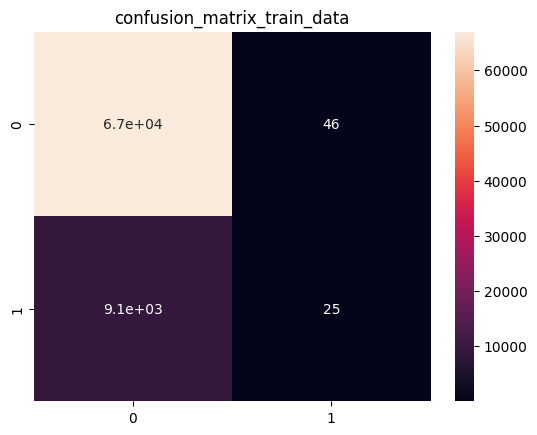

In [224]:
# Visualizing evaluation Metric Score chart
sns.heatmap(confusion_matrix_test,annot=True)
plt.title('confusion_matrix_train_data')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [225]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (cross validation)
from sklearn.model_selection import cross_validate
logistic = LogisticRegression()

# Fit the Algorithm
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

# Predict on the model
print('train accuracy\n',scores['train_accuracy'])
print('test accuracy\n',scores['test_accuracy'])


[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.876, test=0.876) total time=   2.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.2s


[CV] END ................ accuracy: (train=0.876, test=0.876) total time=   2.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.876, test=0.876) total time=   2.2s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.876, test=0.876) total time=   2.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    8.9s


[CV] END ................ accuracy: (train=0.876, test=0.876) total time=   3.5s
train accuracy
 [0.87621203 0.87623663 0.87627814 0.87626994 0.87628224]
test accuracy
 [0.87618485 0.87607006 0.87626482 0.87639602 0.87641242]


##### Which hyperparameter optimization technique have you used and why?

* Here I Tried to apply cross validate method to avoid models overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Accuracy of model is good but its showing that auc_roc score is 0.5 its not good.
* So need to tries other module also.


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [182]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [183]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [184]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [185]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [186]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [187]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [188]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***